<a href="https://colab.research.google.com/github/Arush0113/CE784/blob/main/Arush_190181_Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

### Setting path of Training and Test data in Google Drive

In [2]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [3]:
non_raveling_train = train_path + '/Non_raveling'
raveling_train = train_path + '/Raveling'
test = test_path

### Reading data and storing list of image files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
list_nr_train = os.listdir(non_raveling_train)
list_r_train = os.listdir(raveling_train)
list_test = os.listdir(test)

In [277]:
list_test[:10]

['2.jpg',
 '3.jpg',
 '1.jpg',
 '195.jpg',
 '242.jpg',
 '175.jpg',
 '220.jpg',
 '67.jpg',
 '200.jpg',
 '297.jpg']

In [7]:
list_r_train[:5]

['image406.jpg',
 'image682.jpg',
 'image644.jpg',
 'image451.jpg',
 'image485.jpg']

### Storing Raveling, Non-Raveling and Raveling images in np matrices

In [8]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


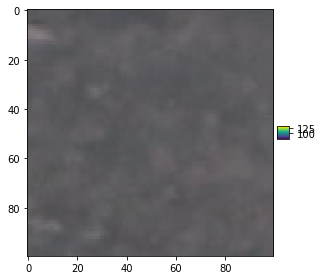

In [167]:
images_nr = []

for i in range(len(list_nr_train)):
  img = io.imread(os.path.join(non_raveling_train,list_nr_train[i]))
  images_nr.append(np.array(img))
  io.imshow(img)


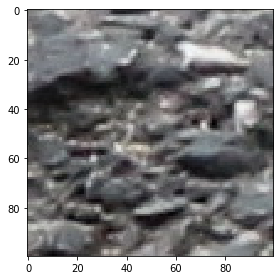

In [168]:
images_r = []

for i in range(len(list_r_train)):
  img = io.imread(os.path.join(raveling_train, list_r_train[i]))
  images_r.append(np.array(img))
  io.imshow(img)

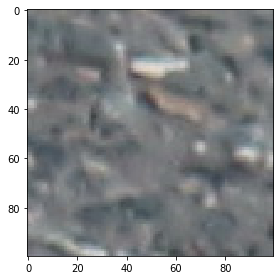

In [169]:
images_test = []

for i in range(len(list_test)):
  img = io.imread(os.path.join(test, list_test[i]))
  images_test.append(np.array(img))
  io.imshow(img)

In [170]:
print(len(images_nr))
print(len(images_r))
print(len(images_test))

351
349
300


In [171]:
images_nr = np.array(images_nr)
print(images_nr.shape)

y_nr = np.zeros((351, 1))
y_nr.shape

(351, 100, 100, 3)


(351, 1)

In [172]:
images_r = np.array(images_r)
images_r.shape

y_r = np.ones((349, 1))
y_r.shape

(349, 1)

In [174]:
images = np.concatenate((images_nr, images_r), axis = 0)
images.shape
y = np.concatenate((y_nr, y_r), axis = 0)
y.shape

(700, 1)

#### Extracting Important Features from images (Mean, Standard Deviation, Skewness, Kurtosis, Entropy, Range and Spearman Correlation)

In [179]:
l = len(images)

mean_b, mean_g, mean_r, std_b, std_g, std_r, skew_b, skew_g, skew_r, kurt_b, kurt_g, kurt_r, entropy_b, entropy_g, entropy_r, range_b, range_g, range_r, spearman_rg, spearman_gb, spearman_rb= [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [];


for i in range(len(images)):
    image = images[i]

    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    
    m1 = (np.sum(image[:,:,0]))/(100*100)
    m2 = (np.sum(image[:,:,1]))/(100*100)
    m3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_r.append(m1)
    mean_g.append(m2)
    mean_b.append(m3)
    
    sq_diff1 = np.sum(np.square((r-m1)))
    sq_diff2 = np.sum(np.square((g-m2)))
    sq_diff3 = np.sum(np.square((b-m3)))
    
    std_r.append(math.sqrt(sq_diff1/(100*100)))
    std_g.append(math.sqrt(sq_diff2/(100*100)))
    std_b.append(math.sqrt(sq_diff3/(100*100)))
    
    skew_r.append(skew((image[:, :, 0]).flatten()))
    skew_g.append(skew((image[:, :, 1]).flatten()))
    skew_b.append(skew((image[:, :, 2]).flatten()))
    
    kurt_r.append(kurtosis((image[:, :, 0]).flatten()))
    kurt_g.append(kurtosis((image[:, :, 1]).flatten()))
    kurt_b.append(kurtosis((image[:, :, 2]).flatten()))
        
    entropy_r.append(entropy(image[:,:,0].flatten()))
    entropy_g.append(entropy(image[:,:,1].flatten()))
    entropy_b.append(entropy(image[:,:,2].flatten()))

    range_r.append(np.max(r)-np.min(r))
    range_g.append(np.max(g)-np.min(g))
    range_b.append(np.max(b)-np.min(b))

    spearman_rg.append(spearmanr((image[:,:,0]).flatten(),(image[:,:,1]).flatten())[0])
    spearman_gb.append(spearmanr((image[:,:,1]).flatten(),(image[:,:,2]).flatten())[0])
    spearman_rb.append(spearmanr((image[:,:,0]).flatten(),(image[:,:,2]).flatten())[0])




#### Creating a dataframe storing all the feautres to be input into the ANN 

In [181]:
data = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b, "entropy_g":entropy_g, "entropy_r":entropy_r, "range_b" : range_b, "range_g" : range_g, "range_r" : range_r,
        "spearman_rg": spearman_rg, "spearman_gb" : spearman_gb, "spearman_rb" : spearman_rb
        }

df = pd.DataFrame(data)

In [182]:
df

,mean_b,mean_g,mean_r,std_b,std_g,std_r,skew_b,skew_g,skew_r,kurt_b,kurt_g,kurt_r,entropy_b,entropy_g,entropy_r,range_b,range_g,range_r,spearman_rg,spearman_gb,spearman_rb
0,125.5533,161.6253,176.6418,13.302442,23.970246,31.041757,-0.845369,-1.426097,-1.486438,0.392278,1.396171,1.555473,9.204519,9.198337,9.193048,78,120,-102,0.972982,0.832214,0.733152
1,114.9893,112.2552,111.5738,17.979121,19.848634,22.445110,0.102146,0.107578,0.054485,-0.869774,-0.905705,-1.032624,9.198081,9.194646,9.189922,102,112,122,0.991757,0.991083,0.985862
2,105.4500,104.0894,103.1808,15.552823,15.971550,15.592733,0.553241,0.529216,0.480791,1.256227,1.192370,1.090367,9.199611,9.198715,9.199038,-121,-118,-118,0.985135,0.992531,0.980287
3,85.2002,81.2174,75.3480,5.718682,6.118230,6.930534,3.280109,3.414642,3.522495,19.581086,20.758976,21.011077,9.208223,9.207698,9.206463,83,88,97,0.863769,0.929336,0.901799
4,105.2561,92.0428,75.0345,15.783590,15.942483,15.246059,0.388948,0.462122,0.592332,1.404309,1.455850,1.628612,9.199142,9.195435,9.189950,127,-127,-126,0.966182,0.985241,0.943893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,152.3457,154.6757,153.6669,23.080550,26.544309,30.989478,-0.331740,-0.138588,-0.090255,-0.190212,-0.476211,-0.530372,9.198530,9.195294,9.189496,-122,-104,-82,0.991465,0.980786,0.961508
696,122.5034,123.3437,124.6599,39.370867,41.126838,42.317966,0.123699,0.197324,0.243535,-0.269808,-0.356378,-0.357282,9.156484,9.152841,9.150996,-43,-39,-31,0.991151,0.991707,0.975217
697,128.3950,125.9815,126.0795,29.824486,32.071239,33.544379,0.404684,0.342772,0.223174,-0.013634,-0.225687,-0.560728,9.183552,9.177982,9.174660,-60,-58,-69,0.993805,0.994371,0.986526
698,131.9930,134.1679,134.4544,29.833715,31.797454,33.574855,-0.011015,0.100728,0.150146,-0.610579,-0.793158,-0.895902,9.184195,9.181861,9.178839,-94,-92,-87,0.995217,0.990107,0.978628


Converting the dataframe to the numpy array x

In [183]:
x = df.to_numpy()
x.shape

(700, 21)

Shuffling x and y variables

In [185]:
permutations = np.random.permutation(700)
x = x[permutations]
y = y[permutations]

One hot-encoding the y vector

In [190]:
y = tf.keras.utils.to_categorical(y)

## Applying Artificial Neural Network (Multi-Layer Perceptron)

#### Importing important deep learning libraries

In [178]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from scipy.stats import spearmanr

#### Creating Neural Network Architecture

In [259]:
input_shape = [x.shape[1]]

mlp = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(2, activation = 'sigmoid'),
])

Compiling the Model

In [279]:
# Compiling the model

path = 'mlp_Raveling_NR_checkpoint/checkpoint_{epoch:02d}';
mlp_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = 'adam')

Training the Model

In [261]:
mlp_history = mlp.fit(x = x, y = y, validation_split = 0.1, epochs = 500, callbacks = [mlp_checkpoint])

Epoch 1/500
20/20 [==============================] - 2s 20ms/step - loss: 0.7532 - acc: 0.6159 - val_loss: 1.3608 - val_acc: 0.5714
Epoch 2/500
20/20 [==============================] - 0s 9ms/step - loss: 0.6109 - acc: 0.6984 - val_loss: 0.8044 - val_acc: 0.6857
Epoch 3/500
20/20 [==============================] - 0s 9ms/step - loss: 0.5321 - acc: 0.7651 - val_loss: 0.7472 - val_acc: 0.6857
Epoch 4/500
20/20 [==============================] - 0s 9ms/step - loss: 0.4864 - acc: 0.8016 - val_loss: 0.7752 - val_acc: 0.5857
Epoch 5/500
20/20 [==============================] - 0s 9ms/step - loss: 0.4685 - acc: 0.7937 - val_loss: 0.8299 - val_acc: 0.4714
Epoch 6/500
20/20 [==============================] - 0s 8ms/step - loss: 0.4412 - acc: 0.8111 - val_loss: 0.8975 - val_acc: 0.4571
Epoch 7/500
20/20 [==============================] - 0s 9ms/step - loss: 0.4444 - acc: 0.8016 - val_loss: 0.9500 - val_acc: 0.4571
Epoch 8/500
20/20 [==============================] - 0s 8ms/step - loss: 0.4269 - 

Plotting the model loss and validation loss

Minimum Validation Loss: 0.1230


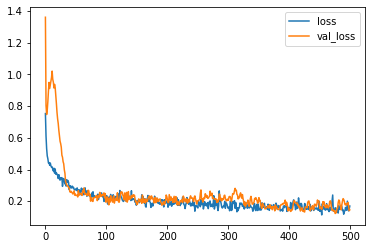

In [262]:
history_df = pd.DataFrame(mlp_history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Plotting the model accuracy and validation accuracy

Maximum Validation Acc: 0.9714


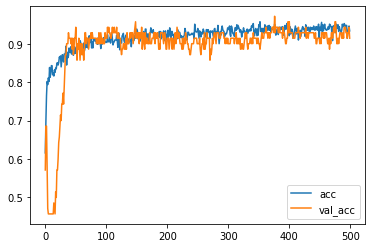

In [281]:
history_df.loc[0:, ['acc', 'val_acc']].plot()
print(("Maximum Validation Acc: {:0.4f}").format(history_df['val_acc'].max()))

### Extracting all features for Testing data

In [263]:
mean_b, mean_g, mean_r, std_b, std_g, std_r, skew_b, skew_g, skew_r, kurt_b, kurt_g, kurt_r, entropy_b, entropy_g, entropy_r, range_b, range_g, range_r, spearman_rg, spearman_gb, spearman_rb= [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [];


for i in range(len(images_test)):
    image = images_test[i]

    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    
    m1 = (np.sum(image[:,:,0]))/(100*100)
    m2 = (np.sum(image[:,:,1]))/(100*100)
    m3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_r.append(m1)
    mean_g.append(m2)
    mean_b.append(m3)
    
    sq_diff1 = np.sum(np.square((r-m1)))
    sq_diff2 = np.sum(np.square((g-m2)))
    sq_diff3 = np.sum(np.square((b-m3)))
    
    std_r.append(math.sqrt(sq_diff1/(100*100)))
    std_g.append(math.sqrt(sq_diff2/(100*100)))
    std_b.append(math.sqrt(sq_diff3/(100*100)))
    
    skew_r.append(skew((image[:, :, 0]).flatten()))
    skew_g.append(skew((image[:, :, 1]).flatten()))
    skew_b.append(skew((image[:, :, 2]).flatten()))
    
    kurt_r.append(kurtosis((image[:, :, 0]).flatten()))
    kurt_g.append(kurtosis((image[:, :, 1]).flatten()))
    kurt_b.append(kurtosis((image[:, :, 2]).flatten()))
        
    entropy_r.append(entropy(image[:,:,0].flatten()))
    entropy_g.append(entropy(image[:,:,1].flatten()))
    entropy_b.append(entropy(image[:,:,2].flatten()))

    range_r.append(np.max(r)-np.min(r))
    range_g.append(np.max(g)-np.min(g))
    range_b.append(np.max(b)-np.min(b))

    spearman_rg.append(spearmanr((image[:,:,0]).flatten(),(image[:,:,1]).flatten())[0])
    spearman_gb.append(spearmanr((image[:,:,1]).flatten(),(image[:,:,2]).flatten())[0])
    spearman_rb.append(spearmanr((image[:,:,0]).flatten(),(image[:,:,2]).flatten())[0])


### Creating the test dataframe

In [264]:
data_test = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b, "entropy_g":entropy_g, "entropy_r":entropy_r, "range_b" : range_b, "range_g" : range_g, "range_r" : range_r, 
        "spearman_rg": spearman_rg, "spearman_gb" : spearman_gb, "spearman_rb" : spearman_rb
        }

df_test = pd.DataFrame(data_test)

In [265]:
df_test.shape

(300, 21)

In [266]:
x_test = df_test.to_numpy()

Making model predictions

In [267]:
MyPredictions = mlp.predict(x_test,verbose=0)

In [268]:
print(MyPredictions.shape)
MyPredictions[:10]

(300, 2)


array([[9.9936360e-04, 9.9905473e-01],
       [4.4886075e-02, 9.5489430e-01],
       [8.5860443e-01, 1.5442701e-01],
       [1.7636010e-02, 9.8322994e-01],
       [1.0000000e+00, 6.7484521e-15],
       [9.5186961e-01, 4.5631357e-02],
       [9.9999976e-01, 3.0921839e-07],
       [9.9966276e-01, 3.0928286e-04],
       [4.9724928e-03, 9.9508780e-01],
       [1.7162545e-05, 9.9998426e-01]], dtype=float32)

In [269]:
myPreds = np.argmax(MyPredictions, axis = 1)

In [270]:
myPreds

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [271]:
Outputs = []

for i in range(len(myPreds)):
  if(myPreds[i] == 0):
    Outputs.append("Non_raveling");
  else:
    Outputs.append("Raveling");
print(len(Outputs))
Outputs

300


['Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Ravel

In [272]:
len(Outputs)

300

Creating predictions CSV file and saving it on Google Drive

In [273]:
test_data = {"filename":list_test, "class":Outputs}

In [274]:
test_output = pd.DataFrame(test_data)

In [275]:
test_output

,filename,class
0,2.jpg,Raveling
1,3.jpg,Raveling
2,1.jpg,Non_raveling
3,195.jpg,Raveling
4,242.jpg,Non_raveling
...,...,...
295,134.jpg,Raveling
296,174.jpg,Raveling
297,237.jpg,Non_raveling
298,126.jpg,Raveling


In [276]:
test_output.to_csv('test_output.csv',index = False)
!cp test_output.csv "drive/My Drive/"